In [67]:
#loading data

from preprocessing import read_consumption_data
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = read_consumption_data()
df

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8
...,...,...,...,...
49489,2023-04-02 21:00:00,helsingfors,6.333000,-1.1
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5


## Baseline 

In [73]:
from sklearn.metrics import mean_squared_error


df["hour"] = df["time"].dt.strftime("%H")
df["weekday"] = df["time"].dt.day_name()
df["baseline_prediction"] = df.groupby(["location", "hour", "weekday"])["consumption"].shift(1)

df = df[~df["baseline_prediction"].isna()]

mape = np.mean(np.abs((df["consumption"] - df["baseline_prediction"]) / df["consumption"]))
rmse = np.sqrt(mean_squared_error(df["consumption"], df["baseline_prediction"]))
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


RMSE: 0.6761786807684869
MAPE: 0.10454635148708204


C:\Users\siver\AppData\Local\Temp\ipykernel_31844\3175705222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hour"] = df["time"].dt.strftime("%H")
C:\Users\siver\AppData\Local\Temp\ipykernel_31844\3175705222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekday"] = df["time"].dt.day_name()
C:\Users\siver\AppData\Local\Temp\ipykernel_31844\3175705222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

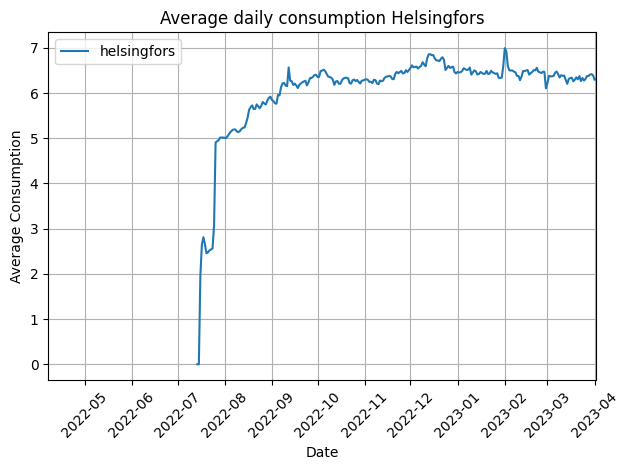

In [49]:
#plotting the consumption for Helsingfors:
date_range = pd.date_range(start=df["time"].dt.date.min(), 
                          end=df["time"].dt.date.max())

daily_avg_consumption= (
    df.groupby([df["time"].dt.date, "location"])["consumption"].mean().unstack()
)


daily_avg_consumption_helsingfors = daily_avg_consumption.reindex(date_range)

plt.plot(date_range, daily_avg_consumption_helsingfors["helsingfors"], label = "helsingfors")
plt.title("Average daily consumption Helsingfors")
plt.xlabel("Date")
plt.ylabel("Average Consumption")
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.xlim(date_range.min(), date_range.max())
plt.tight_layout()
plt.show()


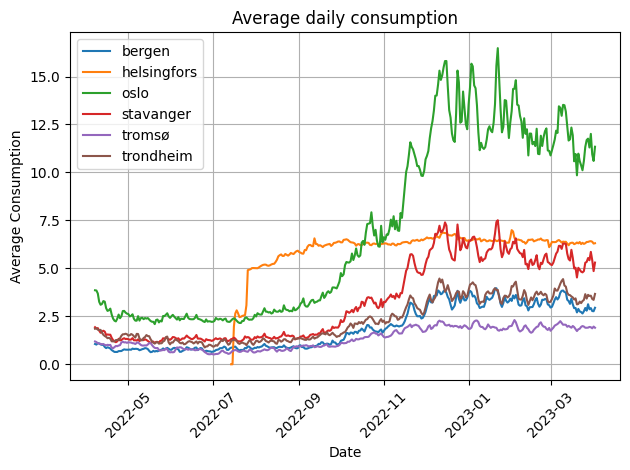

In [50]:
# Plotting average consumprtion for all cities:

daily_avg_consumption= (
    df.groupby([df["time"].dt.date, "location"])["consumption"].mean().unstack()
)

for city in daily_avg_consumption.columns:
    plt.plot(daily_avg_consumption.index, daily_avg_consumption[city], label = city)
plt.title("Average daily consumption")
plt.xlabel("Date")
plt.ylabel("Average Consumption")
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
# Function defining what season a datapoint belongs to 
def get_season(month, day):
    if  month == 3 or month == 4 or month == 5:
        return 'Spring'
    elif month == 6 or month == 7 or month == 8:
        return 'Summer'
    elif month == 9 or month == 10 or month == 11:
        return 'Fall'
    else:
        return 'Winter'


#adding season coloumn
df['season'] = df.apply(lambda row: get_season(row['time'].month, row['time'].day), axis=1)


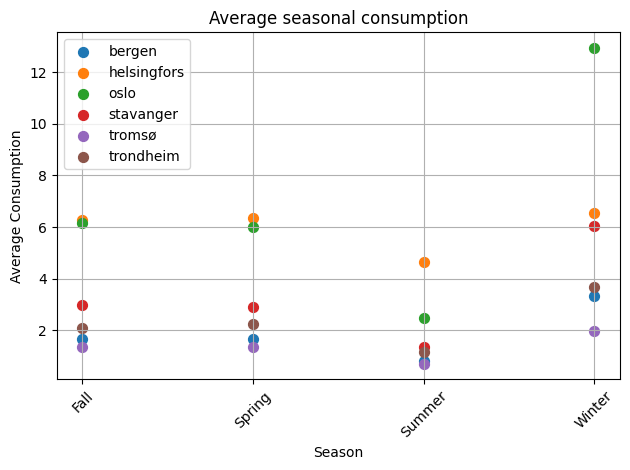

In [52]:
# Plotting average consumption for the cities based on what season it is:
season_avg_consumption= (
    df.groupby([df["season"], "location"])["consumption"].mean().unstack()
)

for city in season_avg_consumption.columns:
    plt.scatter(season_avg_consumption.index, season_avg_consumption[city], label = city, marker='o', s=50)
plt.title("Average seasonal consumption")
plt.xlabel("Season")
plt.ylabel("Average Consumption")
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[6.01527046647267, -0.9781012628557562, 5.638870278272605, 6.398659644652891, 0.5728578253824383, 4.159502160447873]
location     bergen  helsingfors       oslo  stavanger     tromsø  trondheim
season                                                                      
Fall       9.088141     8.181685   8.321520  10.247756   3.428984   7.503984
Spring     6.015270    -0.978101   5.638870   6.398660   0.572858   4.159502
Summer    14.363043    17.328052  17.499864  14.620290  13.004846  14.264130
Winter     1.315648    -0.692593  -2.181296   2.700000  -3.256852  -1.333889


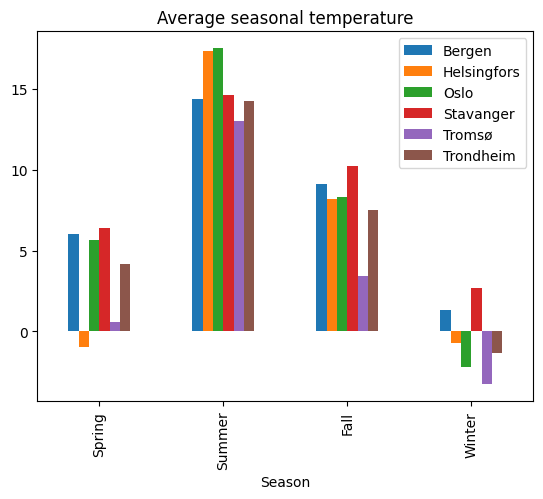

In [53]:
# Plotting average consumption for the cities based on what season it is:
season_avg_temperature= (
    df.groupby([df["season"], "location"])["temperature"].mean().unstack()
)

print(season_avg_temperature.loc["Spring"].tolist())

print(season_avg_temperature.head())


new_df = pd.DataFrame([["Spring"]+(season_avg_temperature.loc["Spring"].tolist()),
                  ["Summer"] + (season_avg_temperature.loc["Summer"].tolist()),
                    ["Fall"] + (season_avg_temperature.loc["Fall"].tolist()),
                    ["Winter"] + (season_avg_temperature.loc["Winter"].tolist())], 
                    columns=["Season", "Bergen", "Helsingfors", "Oslo", "Stavanger", "Tromsø", "Trondheim"])

new_df.plot(x="Season",
        kind="bar",
        stacked=False,
        title="Average seasonal temperature")
# # Create a scatter plot for each city
# for city in season_avg_temperature.columns:
#     x_values = range(len(season_avg_temperature.index))
#     y_values = season_avg_temperature[city]
#     plt.bar(x_values, y_values, label=city)  # 'o' marker for circles, s for marker size

# # Set x-axis labels to be the seasons
# plt.xticks(range(len(season_avg_temperature.index)), season_avg_temperature.index)

# plt.title("Average seasonal temperature")
# plt.xlabel("Season")
# plt.ylabel("Average temperature")
# plt.legend()
# # plt.grid(True)

# # Display the plot
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



df.drop("season", axis=1, inplace=True)




## Correlation plot

c:\Users\siver\NTNU Høst 2023\Anvendt data\Project\anvendt-data-science\preprocessing.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["consumption_normalized"] = df.groupby("location")["consumption"].transform(
c:\Users\siver\NTNU Høst 2023\Anvendt data\Project\anvendt-data-science\preprocessing.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[f"mean_consumption_{lookback}d"] = df.groupby(["hour", "location"])[
c:\Users\siver\NTNU Høst 2023\Anvendt data\Project\anvendt-data-science\preprocessing.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a f

Dropping 2592 of 49494 rows (5%)


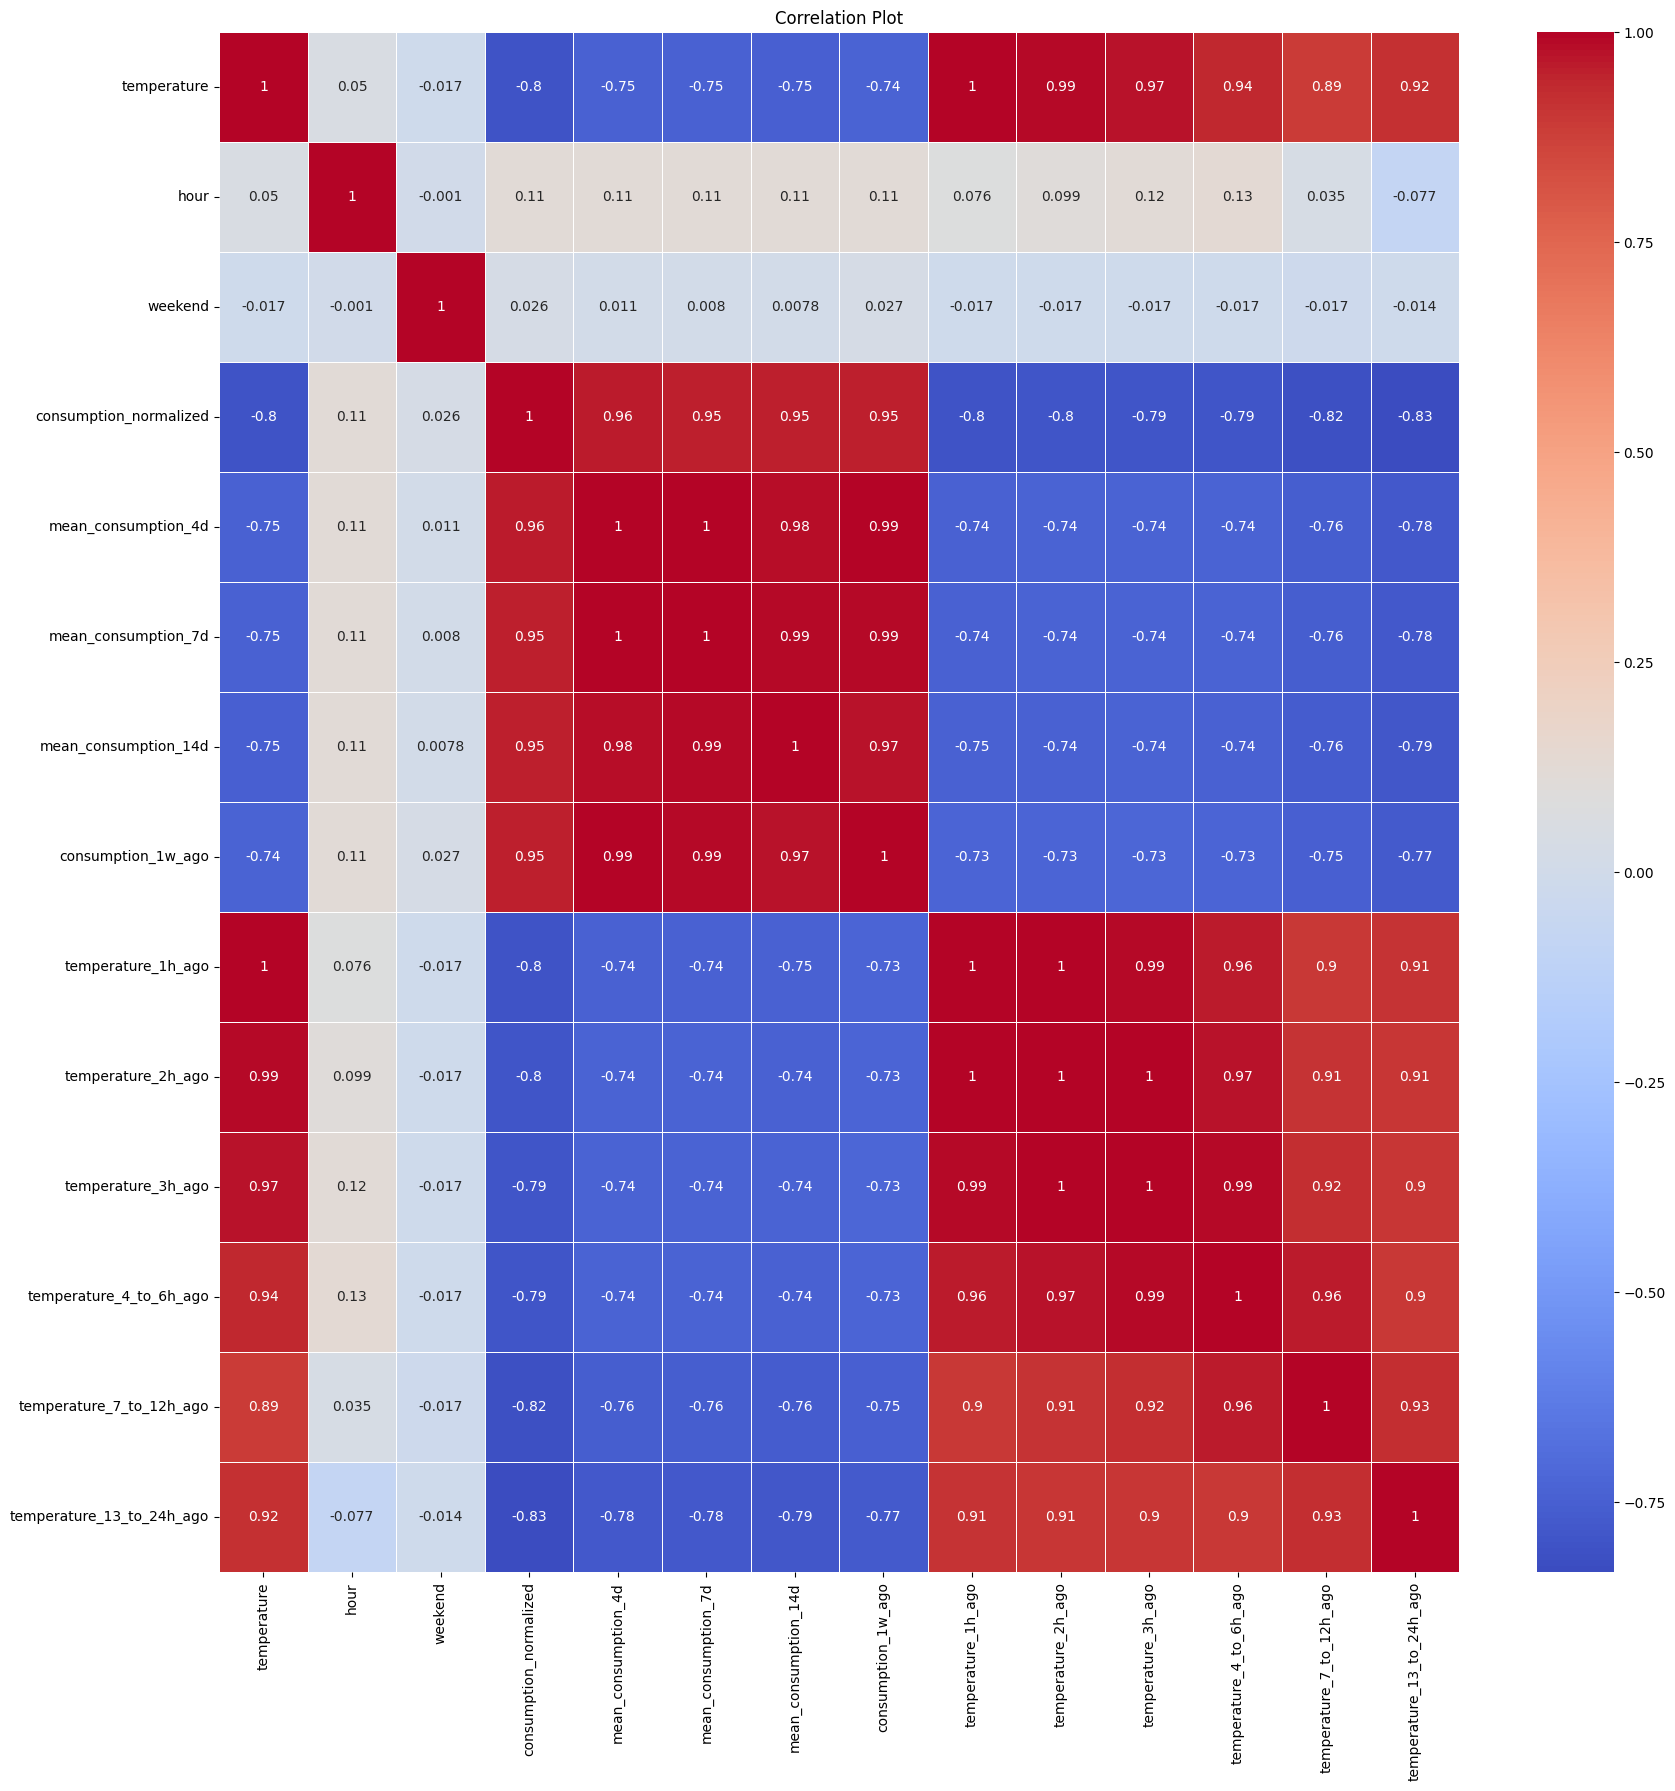

In [59]:
from preprocessing import preprocess_consumption_data


df = read_consumption_data()
df = preprocess_consumption_data(df)
df.drop(["location", "time","weekday"], axis=1, inplace=True )
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')

plt.show()

## Descriptive and summary statistics of dataset

In [85]:
#Min max vanlues
min_consumption_id = df["consumption"].idxmin()
max_consumption_id = df["consumption"].idxmax()

min_consumption = df.at[min_consumption_id,"consumption"]
max_consumption = df.at[max_consumption_id,"consumption"]

print(min_consumption, "Date:", df.at[min_consumption_id,"time"])
print(max_consumption, "Date:", df.at[max_consumption_id,"time"])

0.3726369999999999 Date: 2022-06-29 02:00:00
18.045011 Date: 2022-12-24 15:00:00


In [87]:
# Summary statistics
df.describe()

,time,consumption,temperature,baseline_prediction
count,47478,47478.000000,47478.000000,47478.000000
mean,2022-10-18 00:27:07.347402752,3.581094,6.516928,3.507830
min,2022-04-21 21:00:00,0.372637,-17.299999,0.372637
25%,2022-07-29 15:00:00,1.283722,0.900000,1.253472
50%,2022-10-20 01:00:00,2.442891,6.900000,2.353398
75%,2023-01-10 11:00:00,5.380018,12.100000,5.203815
max,2023-04-02 21:00:00,18.045011,30.500000,18.045011
std,NaN,3.134163,7.695729,3.105171
